In [37]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [38]:
ticker = 'AAPL'
apple_data = yf.download(ticker , start='2010-01-01',end='2024-01-01')
apple_data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.454505,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.465665,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.362819,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.351056,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.393283,447610800
...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,192.868149,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.320206,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.419830,48087700


In [39]:
apple_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3522 entries, 2010-01-04 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3522 non-null   float64
 1   High       3522 non-null   float64
 2   Low        3522 non-null   float64
 3   Close      3522 non-null   float64
 4   Adj Close  3522 non-null   float64
 5   Volume     3522 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 192.6 KB


In [40]:
apple_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3522.000000,3522.000000,3522.000000,3522.000000,3522.000000,3.522000e+03
mean,59.883701,60.528731,59.267621,59.926226,57.701397,2.422834e+08
std,55.387520,56.014467,54.812449,55.444533,55.642305,2.204578e+08
min,6.870357,7.000000,6.794643,6.858929,5.792196,2.404830e+07
25%,19.680447,19.832321,19.402321,19.608571,16.986194,9.266760e+07
50%,32.303749,32.633751,32.078751,32.340000,29.103412,1.526602e+08
75%,91.213125,92.512501,90.425623,91.207499,88.971640,3.284715e+08
max,198.020004,199.619995,197.000000,198.110001,197.361084,1.880998e+09


In [41]:
corr = apple_data.corr()
corr

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999907,0.999887,0.999767,0.999716,-0.529344
High,0.999907,1.000000,0.999861,0.999888,0.999832,-0.528420
Low,0.999887,0.999861,1.000000,0.999893,0.999851,-0.530831
Close,0.999767,0.999888,0.999893,1.000000,0.999950,-0.529698
Adj Close,0.999716,0.999832,0.999851,0.999950,1.000000,-0.528539
Volume,-0.529344,-0.528420,-0.530831,-0.529698,-0.528539,1.000000


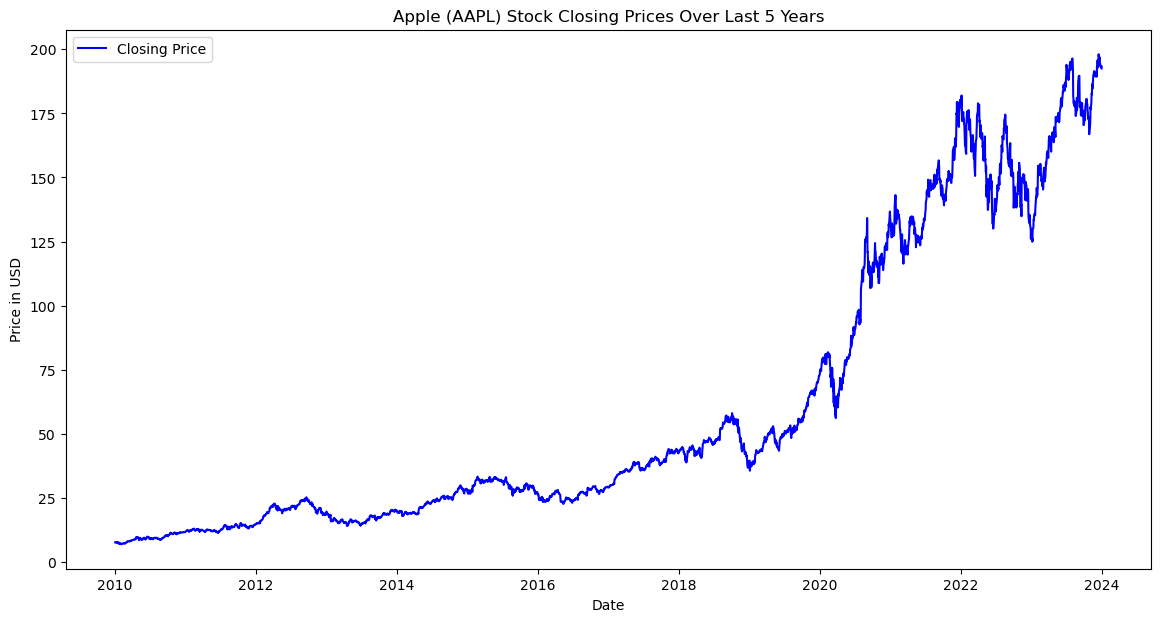

In [42]:
plt.figure(figsize=(14, 7))
plt.plot(apple_data['Close'], label='Closing Price', color='blue')
plt.title('Apple (AAPL) Stock Closing Prices Over Last 5 Years')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.legend()
plt.show()

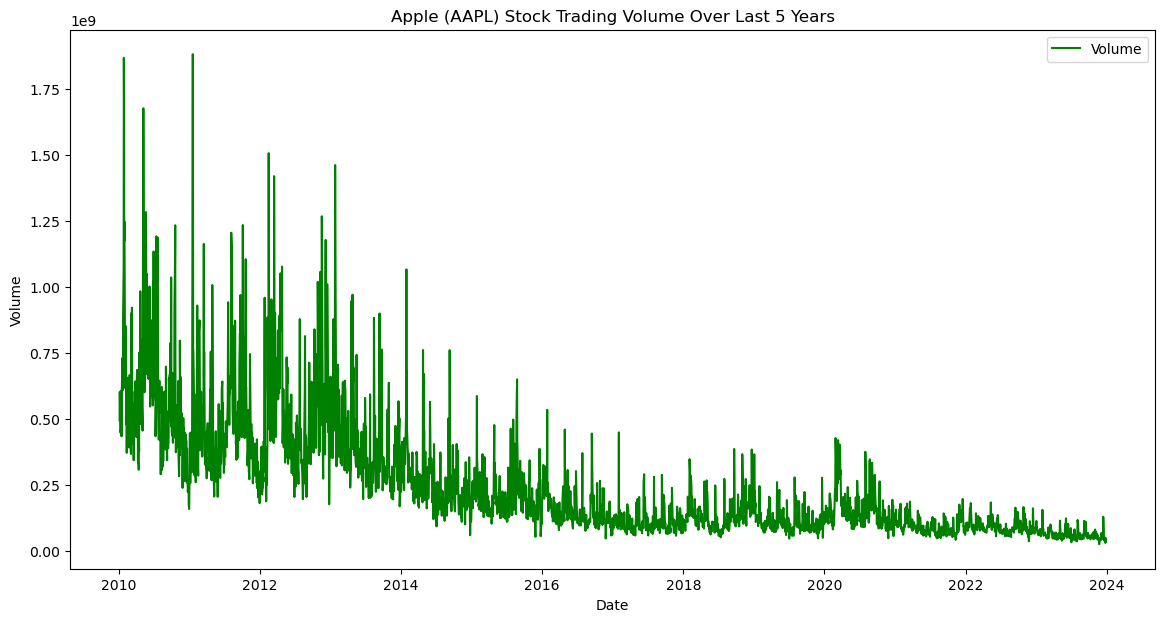

In [43]:
plt.figure(figsize=(14, 7))
plt.plot(apple_data['Volume'], label='Volume', color='green')
plt.title('Apple (AAPL) Stock Trading Volume Over Last 5 Years')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

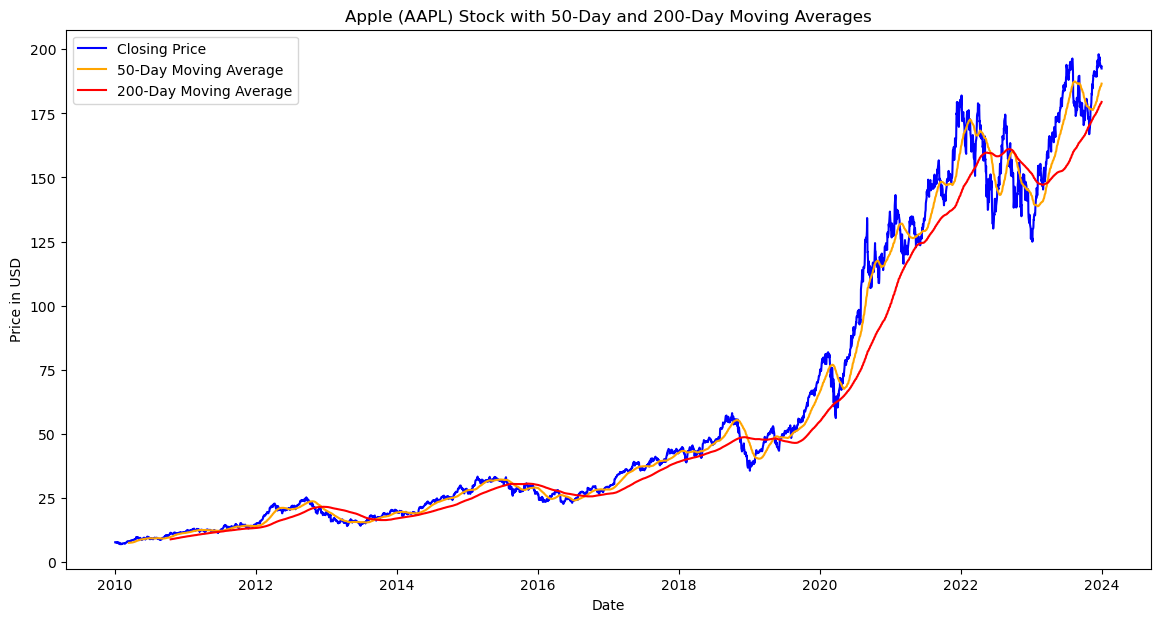

In [44]:
apple_data['50_MA'] = apple_data['Close'].rolling(window=50).mean()
apple_data['200_MA'] = apple_data['Close'].rolling(window=200).mean()

plt.figure(figsize=(14, 7))
plt.plot(apple_data['Close'], label='Closing Price', color='blue')
plt.plot(apple_data['50_MA'], label='50-Day Moving Average', color='orange')
plt.plot(apple_data['200_MA'], label='200-Day Moving Average', color='red')
plt.title('Apple (AAPL) Stock with 50-Day and 200-Day Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.legend()
plt.show()

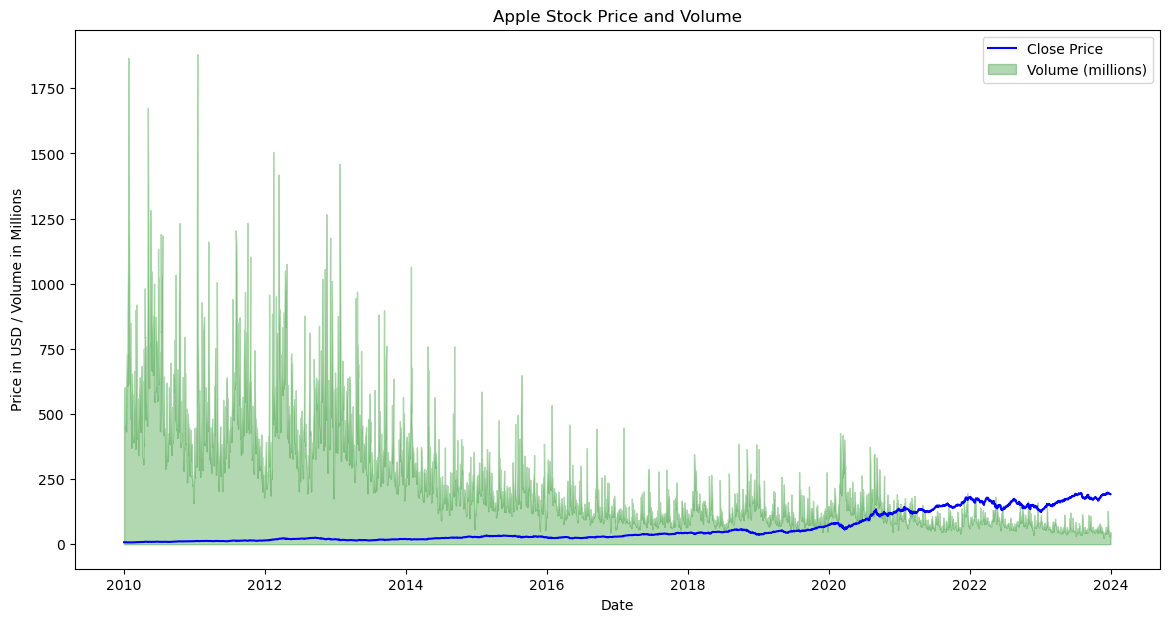

In [45]:
plt.figure(figsize=(14,7))
plt.plot(apple_data['Close'], label='Close Price', color='blue')
plt.fill_between(apple_data.index, apple_data['Volume']/10**6, label='Volume (millions)', color='green', alpha=0.3)
plt.title('Apple Stock Price and Volume')
plt.xlabel('Date')
plt.ylabel('Price in USD / Volume in Millions')
plt.legend()
plt.show()


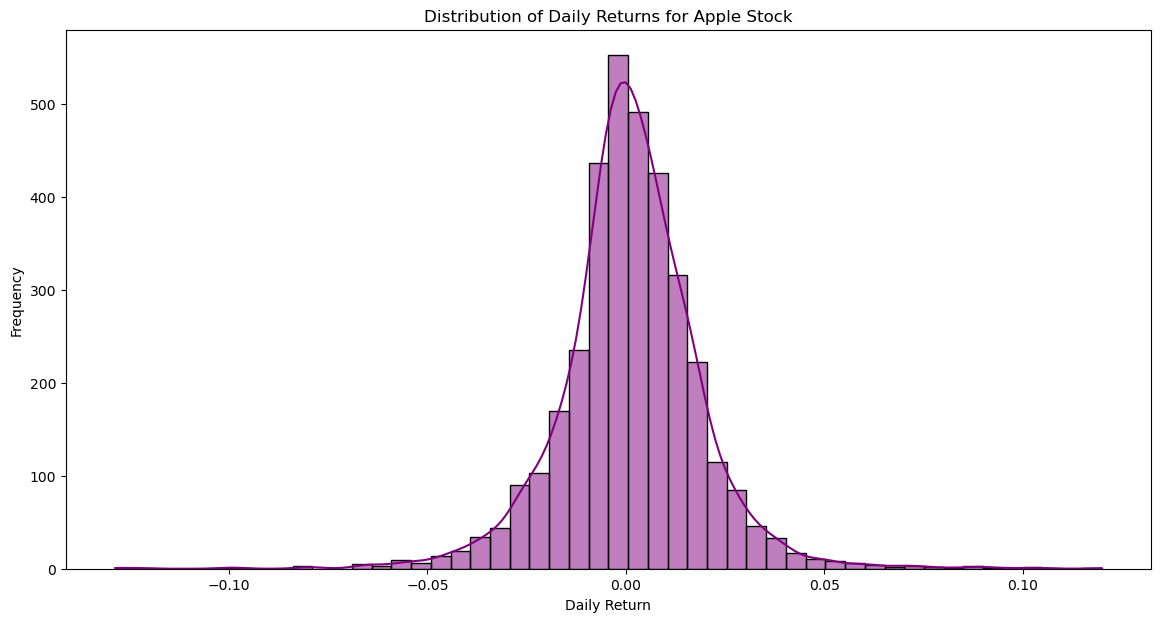

In [46]:
apple_data['Daily Return'] = apple_data['Close'].pct_change()

plt.figure(figsize=(14, 7))
sns.histplot(apple_data['Daily Return'].dropna(), bins=50, color='purple', kde=True)
plt.title('Distribution of Daily Returns for Apple Stock')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


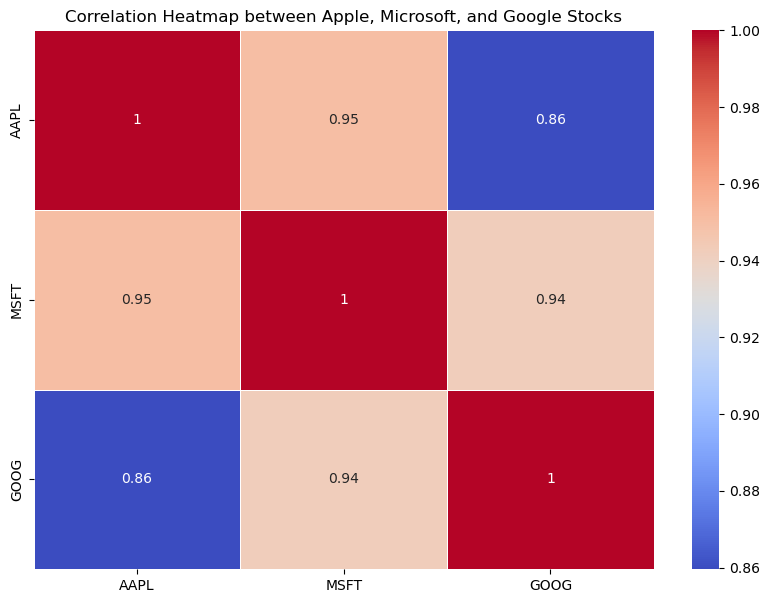

In [47]:
msft_stock = yf.download('MSFT', period='5y')['Close']
goog_stock = yf.download('GOOG', period='5y')['Close']

# Combine into one DataFrame
tech_stocks = pd.DataFrame({
    'AAPL': apple_data['Close'],
    'MSFT': msft_stock,
    'GOOG': goog_stock
})

corr_matrix = tech_stocks.corr()

plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap between Apple, Microsoft, and Google Stocks')
plt.show()


In [50]:
apple_data['Daily Return'] = apple_data['Daily Return'].fillna(apple_data['Daily Return'].mean())

In [51]:
x = apple_data.drop(columns=['Close','Volume','50_MA','200_MA'])
y= apple_data['Close']

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

model = LinearRegression()

model.fit(x_train,y_train)

y_predict = model.predict(x_test)

msr = mean_squared_error(y_test ,y_predict)
msr

0.1252390528651979

In [ ]:
print(apple_data.isna().sum())

# Check for infinity values
print(np.isinf(apple_data).sum())